In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, GlobalMaxPooling1D, Dropout 

### **Read Dataset**

In [3]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')

In [4]:
df_train.head()

,class1,class2,class3,class4,class5,class6,class7,class8,class9,class10,class11
0,با زدن کد دستوری 223 10 اهنگ پیشواز لغو ن...,\nسلام. من مشترک ۹۱۲ هستم. برای فعال کردن آوای...,سلام علیکم آقا خسته نباشید. میخواستم یک کد اوا...,من دو سه روزه پیشوازمو زدم و فعال کردمش امروز ...,سلام صبح بخیر. ببخشید مزاحم میشم من لیست آوای ...,با چه کدی می تونم کد پیش صدا خط خودمو بگیرم,آقا من از یکی پرسیدم این آهنگی که میخونه پشت خ...,ببخشیدمن دوباره تماس میگیرم. قبلا هم پیام داده...,باید چه کدی رو بزنم که آوای انتظارم دیگه تمدید...,برای جایگزین کردن اهنگ پشت سیمکارتی چه شماره ...,من قبل از پونزده روز آوای انتظارم رو غیرفعال ک...
1,سلام طاعات و عباداتتون بخیر باشه من میخوام آوا...,از همراه من می خواستم اهنگ پیشواز فعال کنم ام...,من توی عوض کردن آوا مشکل دارم حالا به نظرتون ر...,اوای انتظار فعاله اما بهم زنگ می زنن بوق میخوره,سلام. وقتتون به خیر. صبح تماس گرفتم برام لینک ...,کد اهنگ پشت خطیمو میخوام بدونم,برای دریافت کد پیش صدا خط دوستم از چه روشی می...,چه کدی بزنم اوای انتظارم فعال بشه,آقا این خواننده پیشواز ما برداشته یه حرکت جلف ...,چکار کنم بهم زنگ می زنند پیش اواز جدید پخش بشه,میشه یه مدت پیشوازمو تعلیق کنم
2,سلام وقتتون بخیر داداش عزیزم برای غیرفعالسازی ...,کد زدم اهنگ پیشواز رو فعال کنم اما اهنگ پیشوا...,هر کاری می کنم اوای انتظار تغییر نمی کنه,سلام من آهنگ پیشواز رو فعال کردم ولی آهنگ پخش...,شعر ببار ای بارون ببار,میخام کد اهنگ پشت خطی خودمو بگیرم چکار کنم,کد اهنگ پشت خط همسرمو خام ایمو ارسال کنید,برای فعال کردن اهنگ پشت خطی روی خط خود از چه ...,نمیخوام پیش صدایی که روی خطم فعاله خودش تمدید...,سلام خسته نباشید من موقع فعالسازی آوای انتظار ...,هوا چطوره
3,سلام خسته نباشید. آوای انتظارم رو غیر فعال کرد...,میخوام اهنگ پیشواز فعال کنم اما از هیچ روشی ن...,سلام منو راهنمایی کنید یه کدیو اشتباه زدم یه آ...,داداشم اوای انتظار فعال کرده ولی اوای انتظارش...,سلام وقت بخیر آقا این لیست آوای انتظار ۱۴۰۲ ر...,اهنگ پشت خطی خط خودمو میخام چه کدی باید بزنم,از چه روشی می توان کد اوای انتظار خط همسایه ر...,اوای انتظارمو که غیرفعال کردم چجوری دوباره فع...,چکار کنم بهم زنگ می زنند پیش اهنگ پخش نشه,تعویضش کن,وقتتون بخیر باشه این آوای انتظاری که من انتخاب...
4,میخواستم اهنگ پیشوازمو لغو کنم برا همین ک...,پیام دادم به 8989 اما فعال نشد,سلام و عصر بخیر آقا. من می‌خواستم آهنگ ا...,از همراه من اهنگ پیشواز فعال کردم هزینش کم شد...,اهنگ پیشواز خوشحالم,کد پیش اهنگی رو خطمه چنده,کد اهنگ خط همسرم رو میخوام,چه جوری میتونم خوشه چین بنان رو بذارم آوای انت...,سلام و صبح بخیر. من می‌خواستم ببنم چطوری...,شیوه جایگزین کردن اهنگ پشت خطی,من دنبال یک رستوران اسپانیایی هستم


In [5]:
print(df_train.shape)
print(df_test.shape)

(340, 11)
(60, 11)


In [6]:
df_train.iloc[0]

class1          با زدن کد دستوری 223 10 اهنگ پیشواز لغو ن...
class2     \nسلام. من مشترک ۹۱۲ هستم. برای فعال کردن آوای...
class3     سلام علیکم آقا خسته نباشید. میخواستم یک کد اوا...
class4     من دو سه روزه پیشوازمو زدم و فعال کردمش امروز ...
class5     سلام صبح بخیر. ببخشید مزاحم میشم من لیست آوای ...
class6           با چه کدی می تونم کد پیش صدا خط خودمو بگیرم
class7     آقا من از یکی پرسیدم این آهنگی که میخونه پشت خ...
class8     ببخشیدمن دوباره تماس میگیرم. قبلا هم پیام داده...
class9     باید چه کدی رو بزنم که آوای انتظارم دیگه تمدید...
class10     برای جایگزین کردن اهنگ پشت سیمکارتی چه شماره ...
class11    من قبل از پونزده روز آوای انتظارم رو غیرفعال ک...
Name: 0, dtype: object

In [7]:
classes = [
        'مشکل غیرفعالسازی آوای انتظار',
        'مشکل فعالسازی آوای انتظار',
        'مشکل تغییر آوای انتظار',
        'مشکل پخش آوای انتظار',
        'لیست آواهای انتظار',
        'دریافت کد آوای انتظار خط خود',
        'دریافت کد آوای انتظار خط دیگران',
        'روش فعالسازی آوای انتظار',
        'روش غیرفعالسازی آوای انتظار',
        'روش تغییرآوای انتظار',
        'خارج از دامنه'
]

In [8]:
def create_dataset(df):
  output = {
        "text": [],
        "category": []
    }

  for data in df.iloc:
    for i,d in enumerate(data):
      output["text"].append(d)
      output["category"].append(classes[i])
   
  return output

In [9]:
train_data = create_dataset(df_train)
test_data = create_dataset(df_test)

In [10]:
print(len(train_data["text"]))
print(len(train_data["category"]))

3740
3740


In [11]:
print(train_data["text"][0])
print(train_data["category"][0])

     با زدن کد دستوری 223 10 اهنگ پیشواز لغو نشد چجوری اهنگ پیشواز رو لغو کنم
مشکل غیرفعالسازی آوای انتظار


In [12]:
train_dataset = pd.DataFrame(train_data)
test_dataset = pd.DataFrame(test_data)

In [13]:
train_dataset.head()

,text,category
0,با زدن کد دستوری 223 10 اهنگ پیشواز لغو ن...,مشکل غیرفعالسازی آوای انتظار
1,\nسلام. من مشترک ۹۱۲ هستم. برای فعال کردن آوای...,مشکل فعالسازی آوای انتظار
2,سلام علیکم آقا خسته نباشید. میخواستم یک کد اوا...,مشکل تغییر آوای انتظار
3,من دو سه روزه پیشوازمو زدم و فعال کردمش امروز ...,مشکل پخش آوای انتظار
4,سلام صبح بخیر. ببخشید مزاحم میشم من لیست آوای ...,لیست آواهای انتظار


In [14]:
train_dataset.shape

(3740, 2)

In [15]:
test_dataset.head()

,text,category
0,سلام خانم، من یه مشکلی با آوای انتظار دارم، چ...,مشکل غیرفعالسازی آوای انتظار
1,برای فعال کردن اهنگ پیشواز از طریق همراه من ا...,مشکل فعالسازی آوای انتظار
2,علو سلام مادر جون. خوبی عزیزم عیدت مبارک باشه ...,مشکل تغییر آوای انتظار
3,اوای انتظار فعال کردم پولشم کم شده اما زنگ می...,مشکل پخش آوای انتظار
4,کد پیشواز از بنان,لیست آواهای انتظار


In [16]:
test_dataset.shape

(660, 2)

In [17]:
train_dataset['category'].value_counts()

مشکل غیرفعالسازی آوای انتظار       340
مشکل فعالسازی آوای انتظار          340
مشکل تغییر آوای انتظار             340
مشکل پخش آوای انتظار               340
لیست آواهای انتظار                 340
دریافت کد آوای انتظار خط خود       340
دریافت کد آوای انتظار خط دیگران    340
روش فعالسازی آوای انتظار           340
روش غیرفعالسازی آوای انتظار        340
روش تغییرآوای انتظار               340
خارج از دامنه                      340
Name: category, dtype: int64

In [18]:
#delete NaN
train_dataset = train_dataset.dropna()
test_dataset = test_dataset.dropna()

In [19]:
print(train_dataset.shape)
print(test_dataset.shape)

(2761, 2)
(484, 2)


**stopword**

In [20]:
def read_stop_words(filename):
  with open(filename) as stopwords_file:
    stopwords = stopwords_file.readlines()
  stopwords = [line.replace('\n', '') for line in stopwords] 
  return stopwords

In [21]:
stopwords = read_stop_words('stopwords.txt')
print(len(stopwords))

1328


In [22]:
# install hazm library
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=d514f9f6b1db215a23fb987279c69b35984642e3de71ffa2edb4cb04d4dc3b38
  Stored in directory: /root/.cache/pip/wheels/ac/62/f6/88933dadcd64a1614894614aa68cf57c4b8e5256acb650b1f1
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp39-cp39-linux_x86_64.whl size=180370 sha256=1173b20966d2f9bc2eee51f6287bdd6473e31d73f3914503b6fe553347730f61
  Stored in directory: /root/.cache/pip/wheels/8e/ff/82/9326b96f96f47472e02c453697b225813e4650c0ed4df2cd49
Successfully built nltk libwapiti
  Attempting unin

In [23]:
from hazm import word_tokenize

def clean_data(dataset):
  text = dataset['text'].values
  text_tokenized = [word_tokenize(t) for t in text]
  text_tokenized_filtered = [[w for w in sentence if w not in stopwords] for sentence in text_tokenized]
  sentence = [' '.join(sentence) for sentence in text_tokenized_filtered]
  # remove numbers and white spaces
  sentence = [s.replace('\u200c', '') for s in sentence]
  sentence = [re.sub('[0-9]+', 'عدد', s) for s in sentence]
  sentence = [re.sub('\s+', ' ', s) for s in sentence]
  return sentence

In [24]:
clean_train_data = clean_data(train_dataset)
clean_test_data = clean_data(test_dataset)

In [25]:
clean_train_data[0]

'زدن کد دستوری عدد عدد اهنگ پیشواز لغو نشد چجوری اهنگ پیشواز لغو'

In [26]:
clean_test_data[0]

'مشکلی آوای انتظار فعالش میخوام غیرفعالش هچین گزینهای پنل کاربریم ندارم ممنون میشم راهنماییم'

### **one hot Y**

In [27]:
def prepare_y(dataset):
  Y = pd.get_dummies(dataset['category']).values
  return Y

In [28]:
category_types = [
        'خارج از دامنه',
        'دریافت کد آوای انتظار خط خود',
        'دریافت کد آوای انتظار خط دیگران',
        'روش تغییرآوای انتظار',
        'روش غیرفعالسازی آوای انتظار',
        'روش فعالسازی آوای انتظار',
        'لیست آواهای انتظار',
        'مشکل تغییر آوای انتظار',
        'مشکل غیرفعالسازی آوای انتظار',
        'مشکل فعالسازی آوای انتظار',
        'مشکل پخش آوای انتظار'
]

In [29]:
category_types

['خارج از دامنه',
 'دریافت کد آوای انتظار خط خود',
 'دریافت کد آوای انتظار خط دیگران',
 'روش تغییرآوای انتظار',
 'روش غیرفعالسازی آوای انتظار',
 'روش فعالسازی آوای انتظار',
 'لیست آواهای انتظار',
 'مشکل تغییر آوای انتظار',
 'مشکل غیرفعالسازی آوای انتظار',
 'مشکل فعالسازی آوای انتظار',
 'مشکل پخش آوای انتظار']

### **Train & Test Split**

In [30]:
X_train = clean_train_data
X_test =  clean_test_data
y_train = prepare_y(train_dataset)
y_test = prepare_y(test_dataset)

In [31]:
print(np.array(X_train).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_test).shape)

(2761,)
(484,)
(2761, 11)
(484, 11)


### **Train The Model**

In [32]:
!pip install transformers
import transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.4 MB/s eta 0:00:00


In [33]:
from transformers import AutoTokenizer,TFBertModel
MODEL_NAME = "HooshvareLab/bert-fa-zwnj-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
bert = TFBertModel.from_pretrained(MODEL_NAME)

Some layers from the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  118297344 
                                                                 
Total params: 118,297,344
Trainable params: 118,297,344
Non-trainable params: 0
_________________________________________________________________


In [35]:
x_train = tokenizer(
    text=X_train,
    add_special_tokens=True,
    max_length=60,
    truncation=True,
    padding="max_length",
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

x_test = tokenizer(
    text=X_test,
    add_special_tokens=True,
    max_length=60,
    truncation=True,
    padding="max_length",
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [36]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [37]:
input_ids[0]

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([    2,  4309,  3441, 12342,  4420,  4420,  4265, 36379,  6009,
        4921, 16097,  4265, 36379,  6009,     3,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)>

In [38]:
input_ids[0].shape

TensorShape([60])

In [39]:
attention_mask[0]

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

In [40]:
attention_mask[0].shape

TensorShape([60])

In [41]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [42]:
max_len = 60
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
embeddings = bert(input_ids, attention_mask=input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation = 'relu')(out)
y = Dense(len(category_types), activation='softmax')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [43]:
optimizer = Adam(
    learning_rate=5e-05, 
    epsilon=1e-08,
    clipnorm=1.0)

In [44]:

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 60)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  118297344   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                            

In [46]:
history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test
    ),
    epochs=8,
    batch_size=8
)

Epoch 1/8


346/346 [==============================] - 126s 196ms/step - loss: 1.4183 - accuracy: 0.5520 - val_loss: 0.7757 - val_accuracy: 0.7727
Epoch 2/8
346/346 [==============================] - 53s 153ms/step - loss: 0.7009 - accuracy: 0.8019 - val_loss: 0.7245 - val_accuracy: 0.8202
Epoch 3/8
346/346 [==============================] - 55s 159ms/step - loss: 0.4516 - accuracy: 0.8696 - val_loss: 0.7279 - val_accuracy: 0.8161
Epoch 4/8
346/346 [==============================] - 55s 159ms/step - loss: 0.3082 - accuracy: 0.9098 - val_loss: 0.7098 - val_accuracy: 0.8388
Epoch 5/8
346/346 [==============================] - 55s 160ms/step - loss: 0.2626 - accuracy: 0.9268 - val_loss: 0.7794 - val_accuracy: 0.8368
Epoch 6/8
346/346 [==============================] - 55s 159ms/step - loss: 0.1844 - accuracy: 0.9478 - val_loss: 0.8503 - val_accuracy: 0.8512
Epoch 7/8
346/346 [==============================] - 55s 158ms/step - loss: 0.1450 - accuracy: 0.9638 - val_loss: 0.8461 - val_accuracy: 0.8533
E

In [49]:
model.save('intent_detection_model.h5')

### **Testing the Model**

In [52]:
# load model
from tensorflow.keras.models import load_model
import transformers

loaded_model = load_model('intent_detection_model.h5', custom_objects={"TFBertModel": transformers.TFBertModel})

In [53]:
predicted_raw = loaded_model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
predicted_raw[0]

16/16 [==============================] - 10s 136ms/step


array([5.0798542e-04, 8.8213483e-04, 6.1284900e-06, 8.0568127e-05,
       2.8577562e-02, 6.8429472e-05, 7.4004085e-05, 1.3595750e-04,
       9.6900898e-01, 5.9617545e-05, 5.9854530e-04], dtype=float32)

In [64]:
def tokenize_sentences(sentence):
  tokenized_sentence = tokenizer(
    text=[sentence],
    add_special_tokens=True,
    max_length=60,
    truncation=True,
    padding="max_length",
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
  
  return tokenized_sentence

In [95]:
def predict(model, sentence):
  tokenized_sentence = tokenize_sentences(sentence)
  pridiction = model.predict({'input_ids':tokenized_sentence['input_ids'],'attention_mask':tokenized_sentence['attention_mask']})[0]
  category_index = np.where(pridiction == max(pridiction))[0][0]
  result = category_types[category_index]
  return result

In [105]:
print(test_dataset['text'][1])
print(test_dataset['category'][1])

 برای فعال کردن اهنگ پیشواز از طریق همراه من اقدام کردم اما فعال نشد چکار کنم
مشکل فعالسازی آوای انتظار


In [106]:
sentence = test_dataset['text'][1]
pridiction = predict(loaded_model, sentence)
print(pridiction)

1/1 [==============================] - 0s 86ms/step
مشکل فعالسازی آوای انتظار


### **Model Evaluation**

In [119]:
y_pred = loaded_model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
y_pred = np.argmax(y_pred, axis=1)

16/16 [==============================] - 2s 136ms/step


In [120]:
y_true = np.argmax(y_test, axis=1)

In [123]:
from sklearn.metrics import f1_score

print(f1_score(y_true, y_pred, average='macro'))
print(f1_score(y_true, y_pred, average='micro'))
print(f1_score(y_true, y_pred, average='weighted'))

0.847369835930072
0.847107438016529
0.8462173289652203


### **Confusion Matrix**

In [113]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
y_pred = loaded_model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})
y_pred = np.argmax(y_pred, axis=1)

16/16 [==============================] - 2s 124ms/step


In [109]:
y_pred

array([ 8,  9, 10, 10,  6,  1,  2, 10,  8,  3,  0,  8,  9,  7, 10,  6,  4,
        2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  2,  2,  5,  4,  3,  0,  8,
        9,  7, 10,  0,  1,  2,  3,  4,  3,  5,  8,  9,  7, 10,  6,  1,  2,
        5, 10,  3,  1,  8,  8,  7, 10,  6,  2,  2,  5,  4,  3,  0,  8,  5,
        7, 10,  5,  1,  2,  5,  2,  3,  6,  8,  9,  7, 10,  6,  1,  2,  5,
        4,  3,  0,  8,  9,  7,  2,  0,  4,  2,  5,  5,  5,  0,  8,  9,  8,
       10,  6,  1,  2, 10,  4,  3,  0,  8, 10,  7, 10,  6,  3,  2,  2,  4,
        3,  0,  8,  9, 10, 10,  6,  2,  2,  1,  4,  3,  0,  8,  9,  7, 10,
        0,  1,  2,  8,  4,  3,  0,  8,  9,  7, 10,  6,  4,  2,  1,  4,  3,
        0,  8,  9,  7, 10,  6,  2,  2,  4,  4,  3,  0,  8,  9,  7, 10,  6,
        1,  2,  2,  5,  3,  0,  8,  9,  7, 10,  5,  1,  2,  5,  2,  3,  0,
        8,  9,  7,  1,  6,  1,  2,  5,  4,  0,  0,  8,  9,  7, 10,  6,  1,
        2,  5,  0,  3,  0,  8,  9,  5, 10,  6,  1,  2,  5,  4,  3,  0,  8,
        9,  7, 10,  6,  1

In [110]:
y_true = np.argmax(y_test, axis=1)

In [111]:
y_true

array([ 8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,
        2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,
        9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,
        5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,
        7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,
        4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7,
       10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,
        3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,
        6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,
        0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,
        1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,
        8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,
        2,  5,  4,  3,  0,  8,  9,  7, 10,  6,  1,  2,  5,  4,  3,  0,  8,
        9,  7, 10,  6,  1

In [114]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        45
           1       0.82      0.74      0.78        50
           2       0.75      1.00      0.86        42
           3       0.95      0.90      0.92        41
           4       0.89      0.77      0.83        44
           5       0.72      0.64      0.67        44
           6       0.95      0.83      0.88        46
           7       0.88      0.88      0.88        34
           8       0.81      0.97      0.88        31
           9       0.98      0.83      0.90        60
          10       0.78      0.89      0.83        47

    accuracy                           0.85       484
   macro avg       0.85      0.85      0.85       484
weighted avg       0.85      0.85      0.85       484



In [116]:
cm = confusion_matrix(y_true, y_pred)

In [117]:
cm

array([[42,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 1, 37,  6,  1,  3,  0,  1,  0,  0,  1,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 37,  0,  2,  0,  1,  0,  0,  0],
       [ 2,  0,  2,  0, 34,  3,  0,  0,  2,  0,  1],
       [ 2,  3,  4,  1,  1, 28,  0,  0,  1,  0,  4],
       [ 3,  3,  0,  0,  0,  2, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 30,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  0,  1,  0,  0,  1,  0,  2,  2, 50,  4],
       [ 0,  1,  1,  0,  0,  1,  0,  1,  1,  0, 42]])

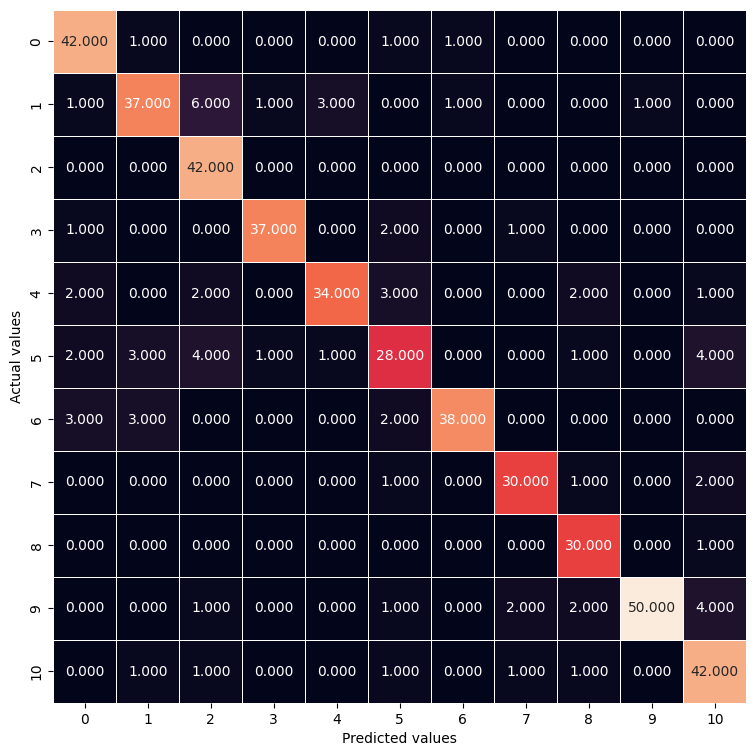

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()